# Popular Data Science Questions

#### Our goal in this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine what content should a data science education company create, based on interest by subject.

## 1. Stack Exchange

### a. What is Stack Exchange ?

![Stack Exchange](./Images/se_logo.png)

Stack Exchange is a network of community-driven question-and-answer websites covering a wide range of topics. It was created in 2008 by Joel Spolsky and Jeff Atwood with the goal of providing a platform for people to share knowledge and help others solve problems.

The Stack Exchange network is made up of individual websites, each dedicated to a particular topic or field. Some of the most popular sites include Stack Overflow, which focuses on programming and software development; Super User, which covers computer hardware and software; and Mathematics Stack Exchange, which is devoted to mathematics.

Users can ask and answer questions, vote on the quality of questions and answers, and earn reputation points for their contributions. The community is moderated by a team of volunteers who help keep the content accurate, useful, and free from spam and abuse. The Stack Exchange network has become a valuable resource for people seeking answers to technical or specialized questions, and has a reputation for providing high-quality, reliable information.

### b. How does Stack Exchange help us ?

- Provides a platform for sharing knowledge.
- Helps solve problems.
- Provides high-quality, reliable information.
- Builds reputation and expertise.

## 2. Data Science Stack Exchange

### a. What is Data Science Stack Exchange ?

Data Science Stack Exchange is one of the many websites in the Stack Exchange network, and provides a platform for people to ask and answer questions related to `data science`, `statistics`, `data analysis`, and `machine learning`.

![dsse_logo](./Images/dsse_logo.png)

## 3. Data Science Stack Exchange Home Page Explorer

On the [home page](https://datascience.stackexchange.com/) we can see that we have four sections:

- [Questions](https://datascience.stackexchange.com/questions) - a list of all questions asked;

![Questions](./Images/dsse_questions.png)

- [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions);

![Tags](./Images/dsse_tags.png)

- [Users](https://datascience.stackexchange.com/users) — a list of users;

![Users](./Images/dsse_users.png)

- [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions;

![Unanswered](./Images/dsse_unanswered.png)

## 4. Data Science Stack Exchange Posts Explorer

in each Post, there is ONE question and possible answer.

Sample Question      |  Sample Answer
:-------------------------:|:-------------------------:
![Sample Question](./Images/dsse_sample_question.png)  |  ![](./Images/dsse_sample_answer.png)

Looking at this example, some of the information we see is:

- For both questions and answers:
    - The posts's score;
    - The posts's title;
    - The posts's author;
    - The posts's body;
- For questions only:
    - How many users have it on their "
    - The last time the question as active;
    - How many times the question was viewed;
    - Related questions;
    - The question's tags;

---

## Data Science Stack Exchange Data Explorer

### 1. Getting the Data

Stack Exchange provides a public data base for each of its websites. [Here](https://data.stackexchange.com/datascience/query/new)'s a link to query and explore Data Science Stack Exchange's database.

To get the relevant data we run the following query.

```sql
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2022;
```

Here's what the first few rows look like:

|   Id  	|   CreationDate   	| Score 	| ViewCount 	|                             Tags                             	| AnswerCount 	| FavoriteCount 	|
|:-----:	|:----------------:	|:-----:	|:---------:	|:------------------------------------------------------------	|:-----------:	|:-------------:	|
| 87185 	| 26/12/2020 23:43 	|   0   	|    105    	| `<logistic-regression><numpy>`                                 	|      2      	|               	|               	
| 87186 	| 27/12/2020 01:41 	|   0   	|    3160   	| `<python><deep-learning><nlp><pytorch><bert>`                  	|      3      	|               	|               	
| 87187 	| 27/12/2020 02:29 	|   0   	|     64    	| `<machine-learning><neural-network><learning-rate>`            	|      1      	|               	|               	
| 87188 	| 27/12/2020 03:29 	|   1   	|     96    	| `<machine-learning><deep-learning><nlp><transformer><chatbot>` 	|      2      	|               	|               	
| 87189 	| 27/12/2020 03:50 	|   1   	|     16    	| `<nlp><text-classification><.net>`                             	|      0      	|               	|               	
| 87190 	| 27/12/2020 03:50 	|   0   	|     43    	| `<tensorflow><game>`                                           	|      1      	|               	|               	
| 87193 	| 27/12/2020 05:44 	|   1   	|    390    	| `<scikit-learn><correlation><pca><variance><matrix>`           	|      1      	|               	|               	
| 87194 	| 27/12/2020 06:42 	|   0   	|     90    	| `<python><keras><scikit-learn><feature-scaling>`               	|      2      	|               	|               	
| 87195 	| 27/12/2020 08:38 	|   5   	|    343    	| `<classification><clustering><difference>`                     	|      3      	|               	|               	
| 87198 	| 27/12/2020 09:36 	|   2   	|    364    	| `<clustering><python-3.x><topic-model>`                        	|      1      	|               	|               	
| 87202 	| 27/12/2020 12:51 	|   0   	|    227    	| `<python><pandas>`                                             	|      1      	|               	|               	

### 2. Exploring the Data

In [20]:
# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [21]:
questions = pd.read_csv("2022_questions.csv", parse_dates=["CreationDate"])
questions

Running questions.info() should gives a lot of useful information.

In [22]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5252 entries, 0 to 5251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             5252 non-null   int64         
 1   CreationDate   5252 non-null   datetime64[ns]
 2   Score          5252 non-null   int64         
 3   ViewCount      5252 non-null   int64         
 4   Tags           5252 non-null   object        
 5   AnswerCount    5252 non-null   int64         
 6   FavoriteCount  19 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 287.3+ KB


We see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

Since the `object` dtype is a catch-all type, let's see what types the objects in `questions["Tags"]` are.

In [23]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags ([source](https://meta.stackexchange.com/a/18879)), so one way to deal with this column is to create five columns in `questions` called `Tag1`, `Tag2`, `Tag3`, `Tag4`, and `Tag5` and populate the columns with the tags in each row.

### 3. Cleaning the Data

We'll begin by fixing `FavoriteCount`.

In [24]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

Let's now modify `Tags` to make it easier to work with.

In [25]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "", regex=True).str.split("><")
questions.sample(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
4229,115507,2022-10-23 17:20:13,1,45,"[clustering, beginner, geospatial]",1,0
3119,113334,2022-08-08 17:57:42,0,69,[xgboost],0,0
4470,115952,2022-11-07 05:41:46,0,17,"[data-cleaning, geospatial, noise]",1,0
1938,111053,2022-05-18 02:35:32,0,17,"[data-mining, transformation]",0,0
2577,112272,2022-06-30 13:16:56,0,19,"[forecasting, retraining]",0,0
2216,111574,2022-06-04 20:05:51,2,134,"[machine-learning, scikit-learn, feature-selec...",1,0
57,106755,2022-01-05 22:31:36,1,155,[nlp],1,0
2459,112037,2022-06-22 11:37:13,0,31,"[training, bert, transformer, language-model, ...",0,0
4841,116594,2022-11-29 20:06:29,0,18,"[neural-network, classification, multiclass-cl...",1,0
4897,116693,2022-12-03 06:08:50,0,12,"[pytorch, computer-vision]",0,0


### 4. Find feature: Most Used and Most Viewed

#### a. Most Used
We'll begin by counting how many times each tag was used

In [26]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

For improved aesthetics, let's transform `tag_count` in a dataframe.

In [27]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
most_used = tag_count.sort_values("Count", ascending=True).tail(20)

The threshold of `20` is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

<Axes: >

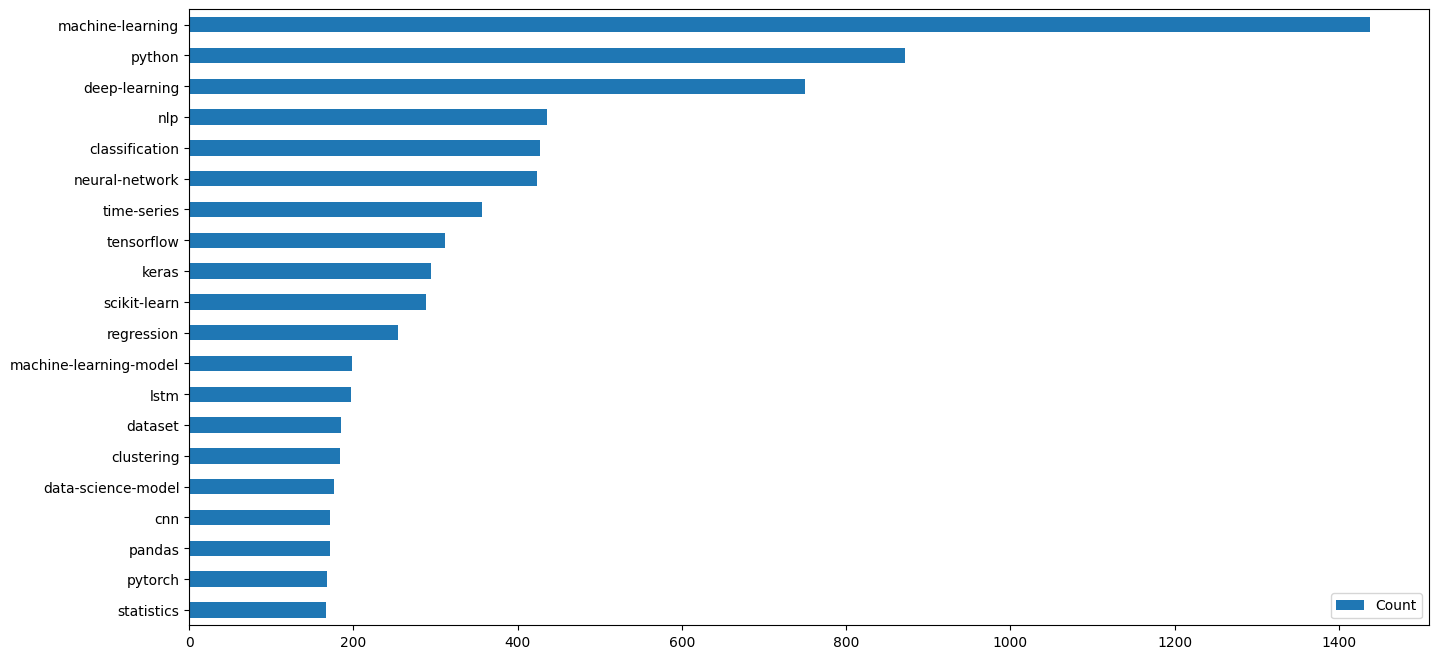

In [28]:
most_used.plot(kind="barh", figsize=(16,8))

#### b. Most Viewed

<Axes: >

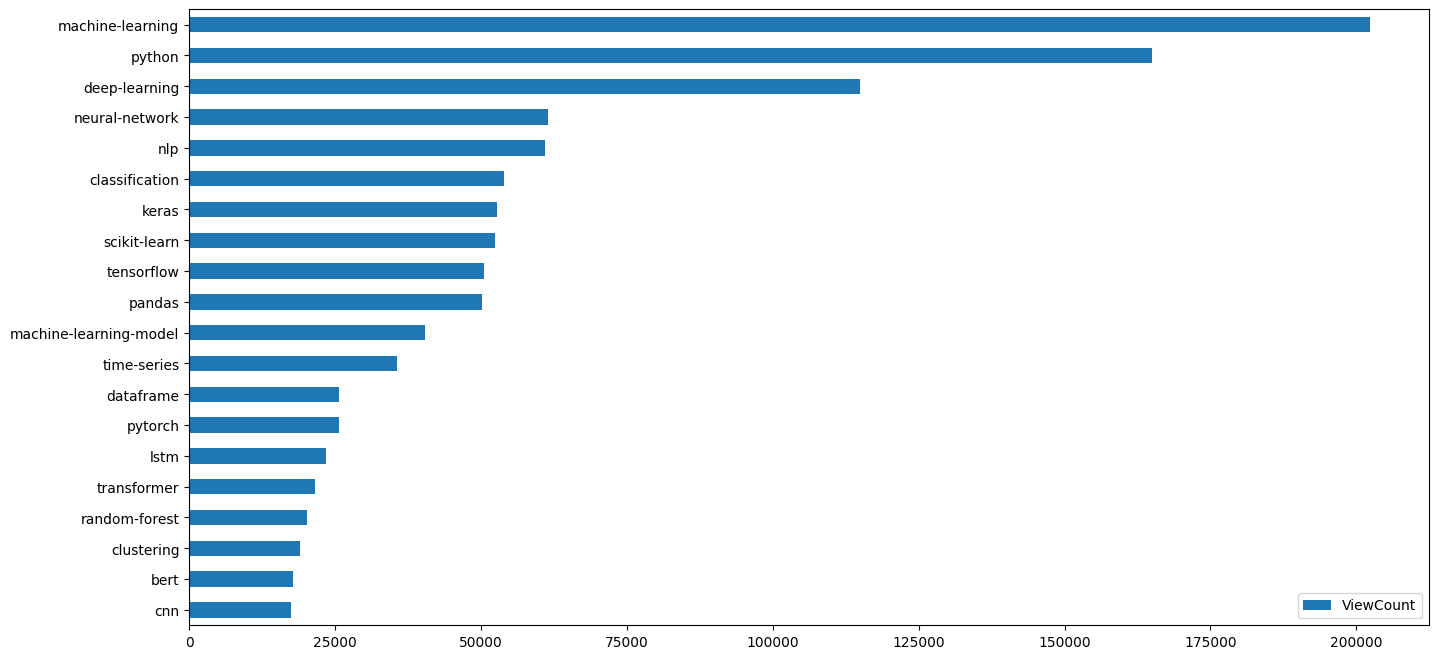

In [29]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

Let's see them side by side.

array([<Axes: title={'center': 'ViewCount'}>], dtype=object)

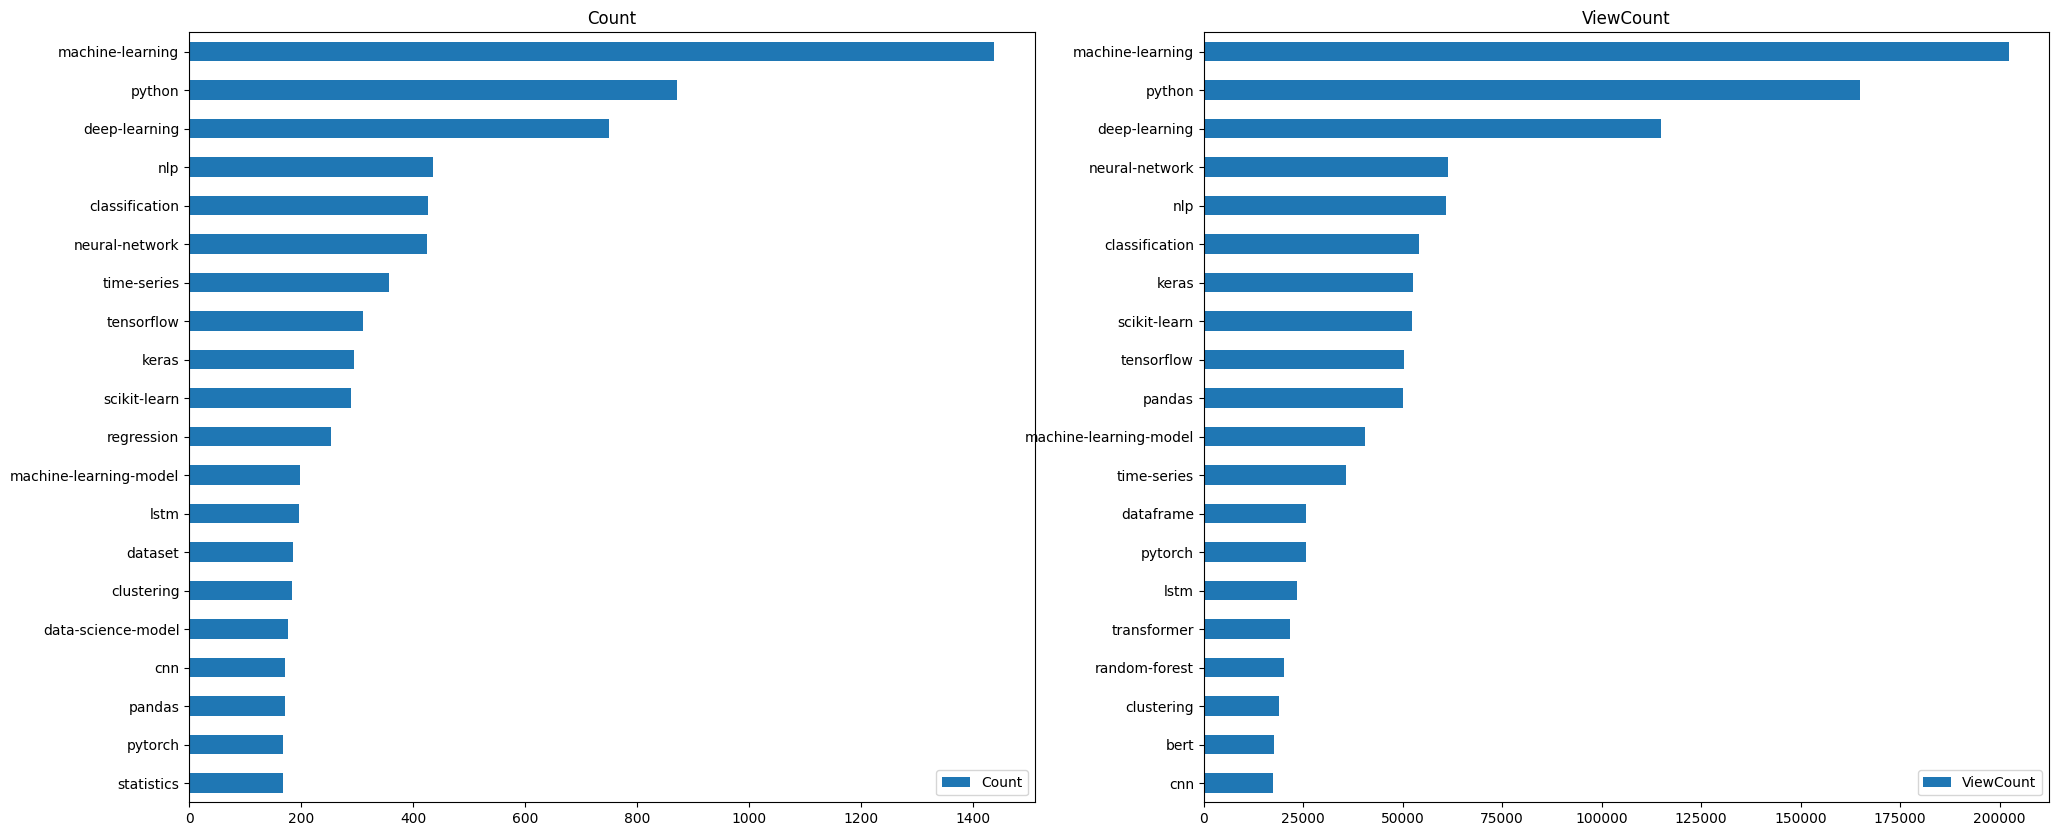

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [31]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

### 5. Relations Between Tags

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags.

In [32]:
all_tags = list(tag_count.index)

In [33]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,python,keras,tensorflow,regression
python,NaN,NaN,NaN,NaN
keras,NaN,NaN,NaN,NaN
tensorflow,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in `questions["Tags"]`, we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [34]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [35]:
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,statistics,pytorch,pandas,cnn,data-science-model,clustering,dataset,lstm,machine-learning-model,regression,scikit-learn,keras,tensorflow,time-series,neural-network,classification,nlp,deep-learning,python,machine-learning
statistics,167,0,3,1,10,8,5,1,7,18,2,0,0,11,3,13,2,10,13,49
pytorch,0,168,1,13,2,4,2,13,3,4,3,6,13,10,18,3,19,45,36,29
pandas,3,1,171,0,4,1,10,2,0,7,18,3,1,8,0,3,2,3,89,18
cnn,1,13,0,172,2,1,3,6,1,12,0,29,30,6,18,11,4,54,25,32
data-science-model,10,2,4,2,177,5,11,5,21,10,14,6,6,9,5,11,7,18,37,81
clustering,8,4,1,1,5,184,4,0,5,5,8,0,0,12,0,13,17,7,31,47
dataset,5,2,10,3,11,4,185,3,7,7,4,5,6,5,8,12,15,13,29,47
lstm,1,13,2,6,5,0,3,197,1,8,3,45,30,66,33,8,18,43,30,44
machine-learning-model,7,3,0,1,21,5,7,1,198,8,15,9,8,7,17,27,4,32,25,89
regression,18,4,7,12,10,5,7,8,8,254,20,10,4,20,21,20,0,22,24,69


It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap.

In [36]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN

<Axes: >

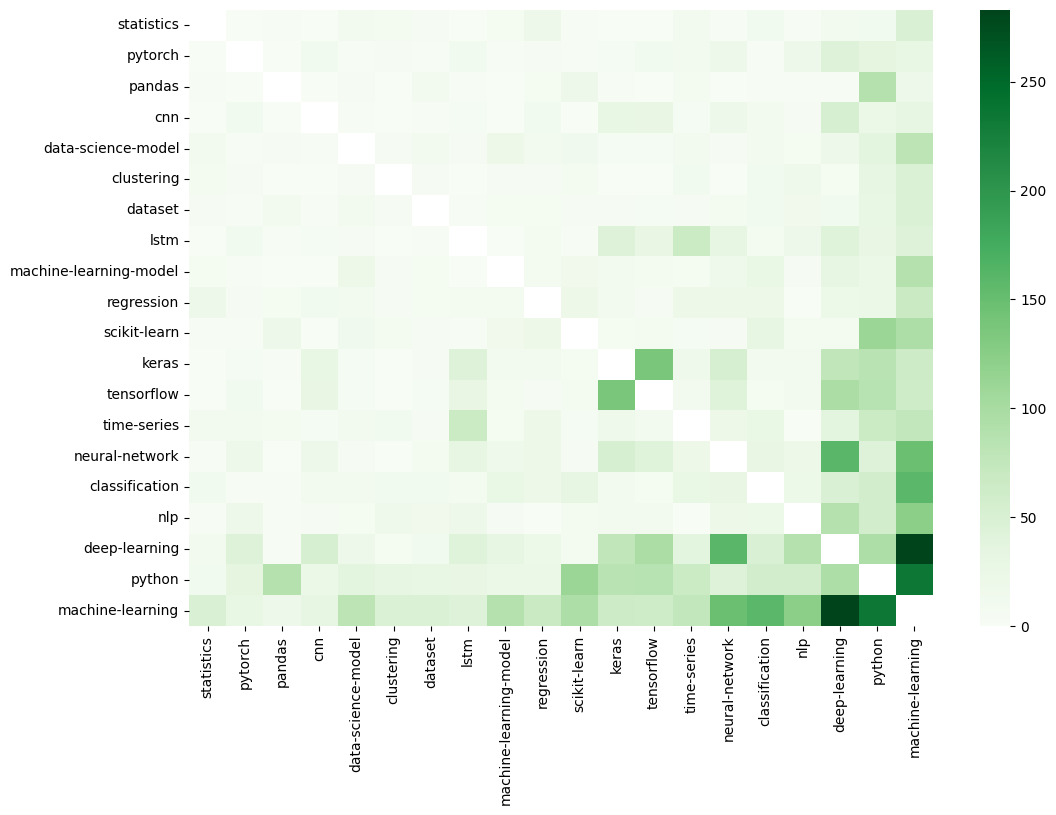

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

### 6. Just a Trend?

In this part, we are going to invest whether "Deep Learning" is just a techlogogical trend.

Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time.

In [38]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

We can use the same technique as before to clean the tags column.

In [39]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "", regex=True).str.split("><")

In [40]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [41]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [42]:
all_q.sample(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,DeepLearning
7070,93943,2021-04-05 06:33:00,2,140,"[scikit-learn, feature-importances]",2,NaN,1
20897,18903,2017-11-05 12:12:00,42,22144,[xgboost],2,NaN,0
1860,32233,2018-05-27 22:29:00,1,568,"[machine-learning, python, perceptron]",1,NaN,0
21354,108897,2022-09-03 07:05:00,0,52,"[machine-learning, linear-regression, feature-...",0,NaN,0
19368,17650,2017-03-16 15:06:00,4,2551,"[machine-learning, neural-network, deep-learni...",1,NaN,1
3187,4827,2015-07-01 16:50:00,1,276,[data-mining],1,NaN,0
12521,69640,2020-03-13 13:32:00,6,2523,"[python, named-entity-recognition, bert]",1,NaN,0
30086,55538,2019-12-07 05:20:00,1,5110,"[python, time-series, pandas]",1,NaN,0
17413,74428,2020-05-19 01:11:00,2,30,"[machine-learning, data-mining, statistics, un...",1,NaN,0
20798,76959,2020-01-07 14:17:00,2,387,"[classification, xgboost, probability, matplot...",0,NaN,0


In [43]:
all_q = all_q[all_q["CreationDate"].dt.year < 2022]

In [44]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [45]:
all_q.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,DeepLearning,Quarter
0,87185,2020-12-26 23:43:00,0,105,"[logistic-regression, numpy]",2,NaN,0,20Q4
1,87186,2020-12-27 01:41:00,0,3160,"[python, deep-learning, nlp, pytorch, bert]",3,NaN,1,20Q4
2,87187,2020-12-27 02:29:00,0,64,"[machine-learning, neural-network, learning-rate]",1,NaN,1,20Q4
3,87188,2020-12-27 03:29:00,1,96,"[machine-learning, deep-learning, nlp, transfo...",2,NaN,1,20Q4
4,87189,2020-12-27 03:50:00,1,16,"[nlp, text-classification, .net]",0,NaN,0,20Q4


In [46]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
10,16Q3,162,573,0.282723
30,21Q3,386,1083,0.356417
27,20Q4,538,1378,0.390421
17,18Q2,587,1450,0.404828
24,20Q1,623,1676,0.371718


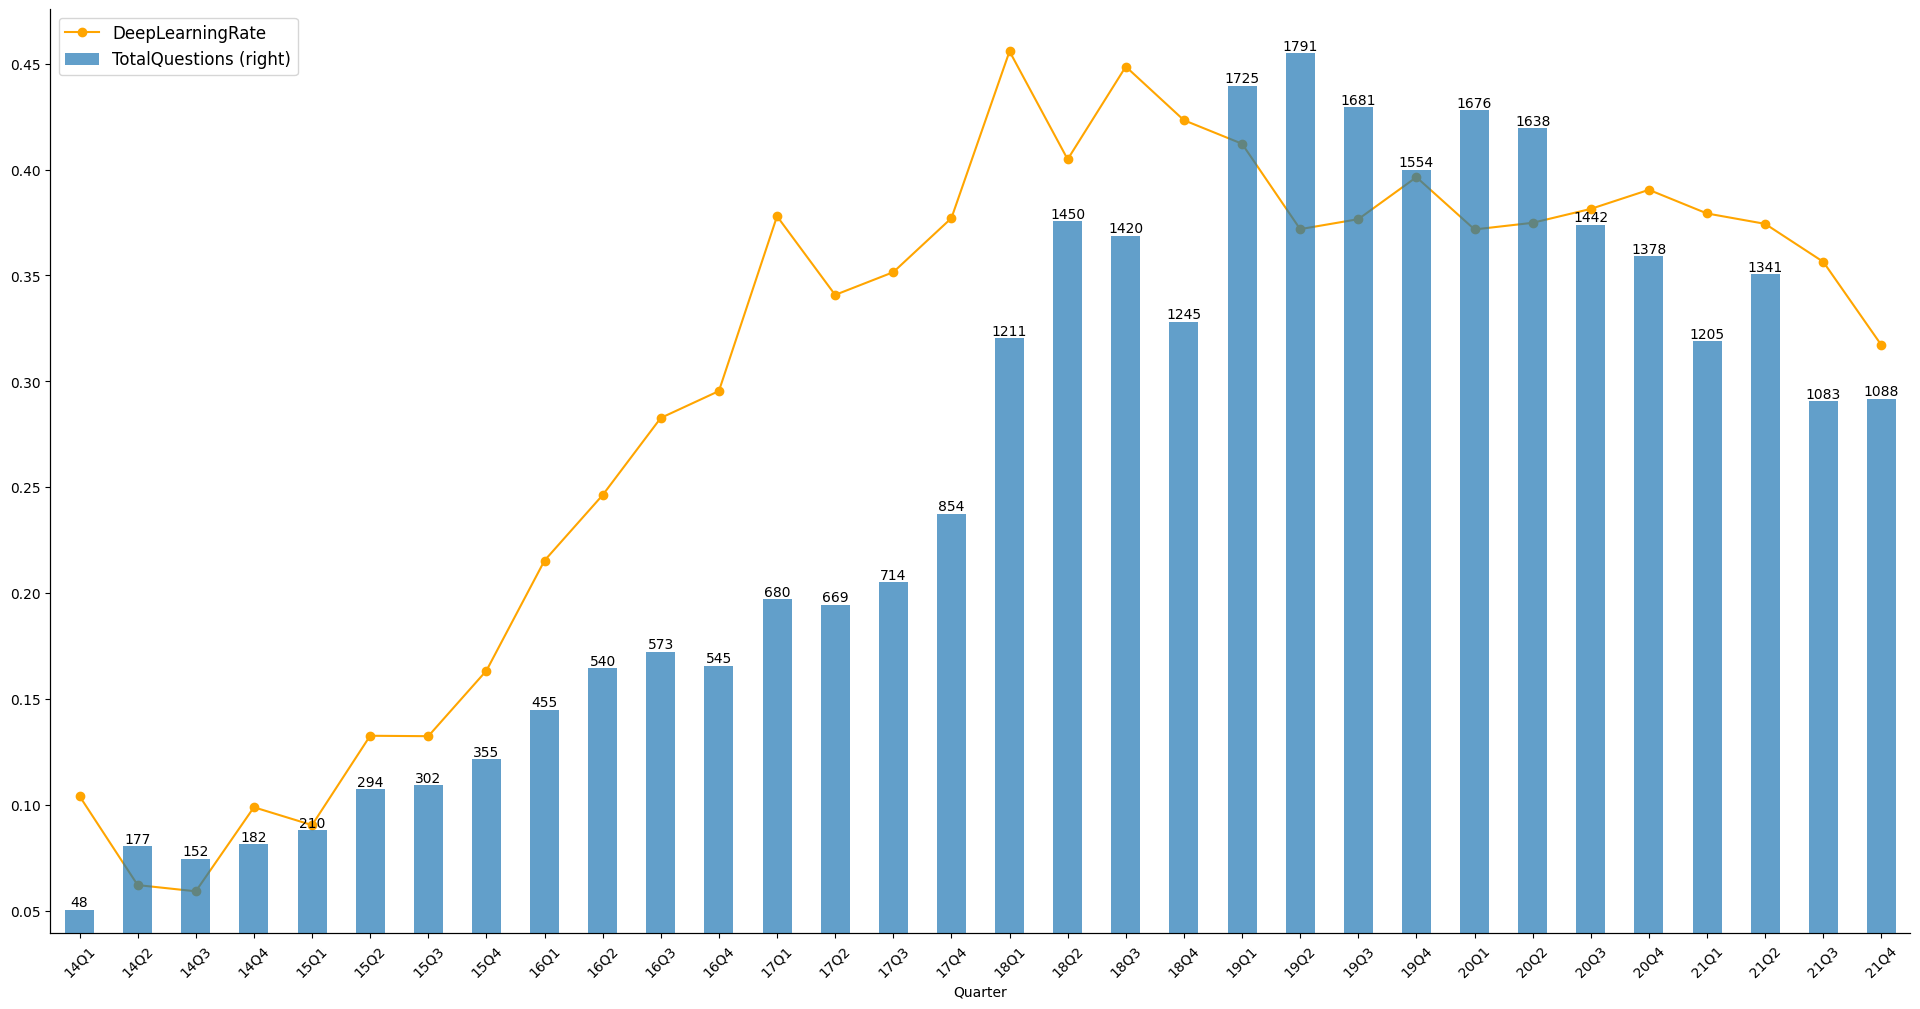

In [47]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].items():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)